```
function ClickConnect(){
console.log("Working");
document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)
```

In [0]:
#from google.colab import auth
#auth.authenticate_user()

In [0]:
#!gsutil cp gs://deepfake_mljc_bucket/Audio/audio_data.h5 /content/audio_data.h5

In [1]:
!gsutil cp gs://deepfake_mljc_bucket/Audio/audio_data_unique.h5 /content/audio_data_unique.h5

Copying gs://deepfake_mljc_bucket/Audio/audio_data_unique.h5...
/ [1 files][  2.4 GiB/  2.4 GiB]   15.5 MiB/s                                   
Operation completed over 1 objects/2.4 GiB.                                      


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from tqdm import tqdm, tqdm_notebook
import pickle
import h5py

rnd = 42

In [0]:
#data = pickle.load(open("/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/data.pkl","rb"))

##data[0] = spectrum of datas, x=time, y=frequency, color=dB
##data[1] = Real or Fake ?
##data[2] = folder of original file audio
##data[3] = name of original file audio

#X = data[0]
#Y = data[1] 

#del data

#s = [X[i].shape[1] for i in range(len(X))]
#m = np.max(s)

#X = np.stack([np.pad(X[i],((0,0),(0,int(m)-X[i].shape[1]),)) for i in range(len(X))])
#Y = (np.array(Y)=='REAL')+0

In [0]:
#hf = h5py.File('/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/data_padded.h5', 'w')

#g1 = hf.create_group('data_padded')

#g1.create_dataset('X',data=X)
#g1.create_dataset('Y',data=Y)

#hf.close()

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#import time
#start = time.time()

#hf = h5py.File('/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/data_49.h5', 'r')

#X_49 = np.array(hf.get('X'))/80+1
#Y_49 = np.array(hf.get('Y'))

#hf.close()

#print(time.time()-start)

39.30340242385864


In [0]:
#with h5py.File('audio_data.hdf5', 'w') as hf:
#    for index, element in enumerate(X):
#      hf.create_dataset(name = 'dataset{:d}'.format(index), data=element)

In [0]:
#Y = []
#with h5py.File('/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/audio_data_Y.h5', 'r') as hf:
#  for keys in list(hf.keys()):
#    Y.append(np.array(hf.get(keys)))
#
#Y = np.stack(Y)

In [0]:
#with h5py.File('/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/data_padded.h5','w') as hf:
#  dset = hf.create_dataset('X', shape=(199950, 128, 393), dtype='float32')
#  for i in tqdm(range(10)):
#    if i<=5:
#      slicearray = pickle.load(open(f"/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/audio_data/part1/X_{i}.pkl","rb"))
#    else:
#      slicearray = pickle.load(open(f"/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/audio_data/part2/X_{i}.pkl","rb"))
#    slicearray = np.stack([np.pad(slicearray[i],((0,0),(0,int(393)-slicearray[i].shape[1]),)) for i in range(len(slicearray))])
#    dset[i*19995:(i+1)*19995,:,:] = slicearray # populate slice i of the HDF5 dataset.

100%|██████████| 10/10 [22:11<00:00, 134.80s/it]


In [0]:
#np.max(X) == 393

In [0]:
#with h5py.File('/content/audio_data_X_padded_compressed.h5','w') as hf:
#  dset = hf.create_dataset('X', shape=(199950, 128, 393), dtype='float32',compression="gzip")
#  with h5py.File('/content/audio_data_X_padded.h5','r') as hf_old:
#    for i in tqdm(range(10)):
#      dset[i*19995:(i+1)*19995,:,:] = hf_old['X'][i*19995:(i+1)*19995,:,:] # populate slice i of the HDF5 dataset.

100%|██████████| 10/10 [25:18<00:00, 157.09s/it]


In [0]:
#!cp /content/drive/My\ Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/audio_data_X_padded_compressed.h5 /content/audio_data_X_padded_compressed.h5

cp: error reading '/content/drive/My Drive/Kaggle/DeepFake/DeepFakeKaggleChallenge/Audio/audio_data_X_padded_compressed.h5': Input/output error


In [0]:
#import time
#start = time.time()

#with h5py.File('/content/audio_data.h5', 'r') as hf:
#    X = (hf['X'][:])/80+1
#    Y = (hf['Y'][:])

#print(time.time()-start)

In [3]:
import time
start = time.time()

with h5py.File('/content/audio_data_unique.h5', 'r') as hf:
    X = (hf['X'][:])
    Y = (hf['Y'][:])

print(time.time()-start)

23.284144639968872


In [4]:
print(X[0,:,:])

[[0.         0.21679276 0.27255267 ... 1.         1.         1.        ]
 [0.358182   0.3672899  0.39146984 ... 1.         1.         1.        ]
 [0.28612137 0.44820803 0.40842354 ... 1.         1.         1.        ]
 ...
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.01249313 ... 1.         1.         1.        ]]


In [5]:
u = np.unique(X,return_index=True,axis=0)
print(len(u[0]))

8440


In [6]:
print(u[0].shape)

(8440, 128, 1024)


In [0]:
X = u[0]
Y = Y[u[1]]

In [8]:
X.shape

(8440, 128, 1024)

In [9]:
Y.shape

(8440, 1)

(array([3354.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5086.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

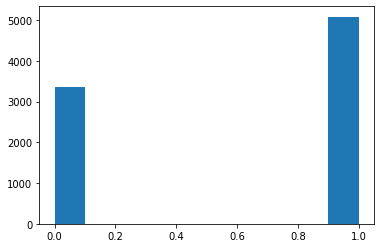

In [10]:
plt.hist(Y)

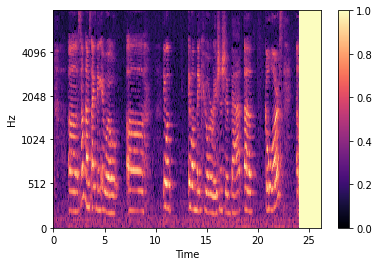

In [11]:
librosa.display.specshow(X[1676,:,:], x_axis='time', y_axis='mel', sr=20000, fmax=8000)
plt.colorbar();

In [12]:
X[0,:,:]

array([[0.        , 0.21679276, 0.27255267, ..., 1.        , 1.        ,
        1.        ],
       [0.358182  , 0.3672899 , 0.39146984, ..., 1.        , 1.        ,
        1.        ],
       [0.28612137, 0.44820803, 0.40842354, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.01249313, ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

# TCN pytorch implementation

In [0]:
# ===============
#     Dataset
# ===============

import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

class FakeAudioDataset(Dataset):
  """Fake Audio dataset."""

  def __init__(self, X_dir, Y):
    """
    Args:
      root_dir (string): Directory with all the datas.
      transform (callable, optional): Optional transform to be applied
      on a sample.
    """
    self.X_dir = X_dir
    self.Y = Y

  def __len__(self):
    return len(self.Y)

  def __getitem__(self, idx):
    
    with h5py.File(self.X_dir, 'r') as hf:
      X = torch.tensor(hf['X'][idx]/80+1)

    return (X,torch.tensor(Y[idx]))

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:,:,:512], Y, test_size=0.2, random_state=rnd)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=rnd)

In [15]:
X_train.shape

(5401, 128, 512)

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

train_data = TensorDataset(
    torch.from_numpy(X_train).float(),
    torch.from_numpy(y_train).float()
    )

test_data = TensorDataset(
    torch.from_numpy(X_test).float(),
    torch.from_numpy(y_test).float()
    )

val_data = TensorDataset(
    torch.from_numpy(X_val).float(),
    torch.from_numpy(y_val).float()
    )

train_data_loader = DataLoader(train_data, batch_size=512, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_data_loader = DataLoader(val_data, batch_size=32, shuffle=False)

In [0]:
import torch
import torch.nn as nn
from torch.nn.utils import weight_norm

'''
original implementation: https://github.com/locuslab/TCN
'''

class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()


class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout=0.2):
        super(TemporalBlock, self).__init__()
        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp1 = Chomp1d(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, kernel_size,
                                           stride=stride, padding=padding, dilation=dilation))
        self.chomp2 = Chomp1d(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                 self.conv2, self.chomp2, self.relu2, self.dropout2)
        self.downsample = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()
        self.init_weights()

    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.1)
        self.conv2.weight.data.normal_(0, 0.1)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.1)

    def forward(self, x):
        out = self.net(x)
        #residuals
        res = x if self.downsample is None else self.downsample(x)
        return self.relu(out + res)


class TemporalConvNet(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(in_channels, out_channels, kernel_size, stride=1, dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size, dropout=dropout)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [0]:
# ======================
#     Model Creation
# ======================

class DeepFakeAudio(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size, dropout):
        super(DeepFakeAudio, self).__init__()
        self.tcn = TemporalConvNet(input_size, num_channels, kernel_size=kernel_size, dropout=dropout)
        self.linear = nn.Linear(num_channels[-1], output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, inputs):
        """Inputs have to have dimension (N, C_in, L_in)"""
        y1 = self.tcn(inputs)  # input should have dimension (N, C, L)
        print(y1.shape)
        o = self.sigmoid(self.linear(y1[:, :, -1]))
        return o

DEVICE = "cuda"

# HYPER-PARAMETERS
# num_chanels (number of filters)
# kernel_size (field of view of the filter)
# dropout

model = DeepFakeAudio(input_size=128, output_size=1, num_channels=[64], kernel_size=3, dropout=0.1)
model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#loss = nn.MSELoss()
loss = nn.BCELoss()
#loss = torch.nn.CrossEntropyLoss()

#binary_cross_entropy takes logistic sigmoid values as inputs
#binary_cross_entropy_with_logits takes logits as inputs
#cross_entropy takes logits as inputs (performs log_softmax internally)
#nll_loss is like cross_entropy but takes log-probabilities (log-softmax) values as inputs

In [23]:
model

DeepFakeAudio(
  (tcn): TemporalConvNet(
    (network): Sequential(
      (0): TemporalBlock(
        (conv1): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(2,))
        (chomp1): Chomp1d()
        (relu1): ReLU()
        (dropout1): Dropout(p=0.1, inplace=False)
        (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(2,))
        (chomp2): Chomp1d()
        (relu2): ReLU()
        (dropout2): Dropout(p=0.1, inplace=False)
        (net): Sequential(
          (0): Conv1d(128, 64, kernel_size=(3,), stride=(1,), padding=(2,))
          (1): Chomp1d()
          (2): ReLU()
          (3): Dropout(p=0.1, inplace=False)
          (4): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(2,))
          (5): Chomp1d()
          (6): ReLU()
          (7): Dropout(p=0.1, inplace=False)
        )
        (downsample): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
        (relu): ReLU()
      )
    )
  )
  (linear): Linear(in_features=64, out_features=1, bias=True)
  (

In [24]:
train_data[100:103][0]

tensor([[[0.7436, 0.6679, 0.5601,  ..., 1.0000, 1.0000, 1.0000],
         [0.7855, 0.7742, 0.7369,  ..., 1.0000, 1.0000, 1.0000],
         [0.8558, 0.8052, 0.7517,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.3500, 0.3258, 0.3167,  ..., 1.0000, 1.0000, 1.0000],
         [0.3684, 0.3363, 0.3270,  ..., 1.0000, 1.0000, 1.0000],
         [0.3144, 0.3078, 0.3074,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.5164, 0.4461, 0.3578,  ..., 1.0000, 1.0000, 1.0000],
         [0.4993, 0.4378, 0.3868,  ..., 1.0000, 1.0000, 1.0000],
         [0.5012, 0.4713, 0.4540,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.3504, 0.3615, 0.3405,  ..., 1.0000, 1.0000, 1.0000],
         [0.3593, 0.3643, 0.3322,  ..., 1.0000, 1.0000, 1.0000],
         [0.3264, 0.3404, 0.3087,  ..., 1.0000, 1.0000, 1.0000]],

        [[0.5487, 0.5206, 0.4891,  ..., 1.0000, 1.0000, 1.0000],
         [0.5525, 0.5561, 0.5349,  ..., 1.0000, 1.0000, 1.0000],
         [0.5475, 0.5501, 0.5564,  ..., 1.0000, 1.0000, 1.

In [25]:
pred = model(train_data[0:3][0].to(DEVICE))
pred

torch.Size([3, 64, 512])


tensor([[0.5066],
        [0.5140],
        [0.4920]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [0]:
train_data[0:3][1]

tensor([1., 1., 0.])

In [0]:
ex = next(iter(train_data_loader))

In [0]:
pred = model(ex[0].to(DEVICE))

In [0]:
ex[1] = ex[1].reshape(-1,1)

In [0]:
torch.sum(torch.round(pred)==ex[1].to(DEVICE)).item()/len(pred)

0.478125

In [0]:
loss(pred, ex[1].float().to(DEVICE)).item()

0.6941004395484924

In [0]:
pred = model(train_data[:][0].to(DEVICE))
print('initial accuracy', torch.sum(torch.round(pred)==train_data[:][1].reshape(-1,1).to(DEVICE)).item()/len(pred))
print('initial loss',loss(pred, train_data[:][1].reshape(-1,1).to(DEVICE)).item())

initial accuracy 0.50484375
initial loss 0.6943520903587341


In [0]:
import gc
gc.collect()
torch.cuda.ipc_collect()
torch.cuda.empty_cache()

In [0]:
torch.cuda.memory_allocated(device=None)*1e-9

0.7666396160000001

In [0]:
# ==============
#    Training
# ==============

epochs = 20
losses = np.zeros([epochs,2])
accs = np.zeros([epochs,2])

for ep in tqdm_notebook(range(epochs)):
  l = []
  a = []
  for Xb, yb in train_data_loader:
    model.train()
    y_pred = model(Xb.to(DEVICE))
    loss_batch = loss(y_pred, yb.reshape(-1,1).float().to(DEVICE))
    a.append(torch.sum(torch.round(y_pred)==yb.reshape(-1,1).to(DEVICE)).item()/len(y_pred))
    l.append(loss_batch.item())
    loss_batch.backward()
    optimizer.step()
    optimizer.zero_grad()
    
  losses[ep,0] = np.mean(l)
  accs[ep,0] = np.mean(a)
  model.eval()
  y_pred = model(val_data[:][0].to(DEVICE))
  losses[ep,1] = loss(y_pred, val_data[:][1].reshape(-1,1).to(DEVICE)).item()
  accs[ep,1] = torch.sum(torch.round(y_pred)==val_data[:][1].reshape(-1,1).to(DEVICE)).item()/len(y_pred)
  

val accuracy: 0.7727609178386381
train accuracy: 0.7765052521433193


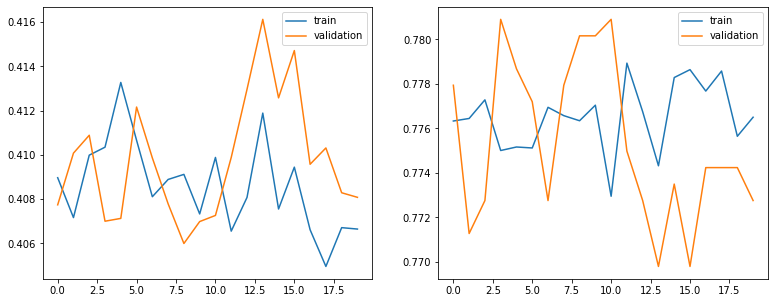

In [0]:
F,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].plot(losses[:,0],label='train')
ax[0].plot(losses[:,1],label='validation')
ax[0].legend()

ax[1].plot(accs[:,0],label='train')
ax[1].plot(accs[:,1],label='validation')
ax[1].legend()
print(f"val accuracy: {accs[-1,1]}")
print(f"train accuracy: {accs[-1,0]}")

In [0]:
# ===============
#    Inference
# ===============

model.eval()
test_pred = model(test_data[:][0].to(DEVICE))

test_loss = loss(test_pred,test_data[:][1].to(DEVICE))

In [0]:
test_loss

tensor(0.1577, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

In [0]:
torch.sum(torch.round(test_pred)==test_data[:][1].reshape(-1,1).to(DEVICE)).item()/len(test_data[:][1])

0.9410187667560321